# Tutorial 2 (kraci)

In [1]:
import scDML
print(scDML.__version__)
import scanpy as sc 
import torch
import anndata as ad
from scDML import scDMLModel
from scDML.utils import print_dataset_information
import matplotlib.pyplot as plt
import scib
import os
os.system("clear")

###############
data_dir="/home/ubuntu/benchmarking/data/"
###############


0.0.1


In [2]:
adata_raw = ad.read_h5ad("/goofys/users/Aleksandra_S/benchmarking_datasets/s1_s_s3_mouse_embryo_concat.h5ad")
adata_raw.obs['BATCH'] = adata_raw.obs.batch

In [3]:
adata_raw

AnnData object with n_obs × n_vars = 327203 × 27557
    obs: 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'annotation', 'Regulon - Alx1', 'Regulon - Alx3', 'Regulon - Alx4', 'Regulon - Arid3a', 'Regulon - Arnt2', 'Regulon - Arx', 'Regulon - Atf4', 'Regulon - Atf6b', 'Regulon - Barhl1', 'Regulon - Barhl2', 'Regulon - Barx1', 'Regulon - Bcl6', 'Regulon - Bclaf1', 'Regulon - Bhlhe40', 'Regulon - Bmyc', 'Regulon - Brca1', 'Regulon - Brf1', 'Regulon - Brf2', 'Regulon - Cdx2', 'Regulon - Cebpa', 'Regulon - Cebpb', 'Regulon - Cebpe', 'Regulon - Cebpg', 'Regulon - Creb1', 'Regulon - Creb3', 'Regulon - Creb3l1', 'Regulon - Creb3l2', 'Regulon - Crem', 'Regulon - Ctcf', 'Regulon - Cux1', 'Regulon - Dbx1', 'Regulon - Ddit3', 'Regulon - Dlx1', 'Regulon - Dlx2', 'Regulon - Dlx3', 'Regulon - Dlx5', 'Regulon - Dlx6', 'Regulon - Dmbx1', 'Regulon - E2f1', 'Regulon - E2f2', 'Regulon - E2f3', 'Regulon - E2f4', 'Regulon - E2f5', 'Regulon - E2f6', 'Regulon - E2f7', '

## Raw dataset visualization

Ima u Harmony delu

## scDML integration

In [5]:
## fullrun
save_dir="./test_result/"+"merged_E15_s1_s2_s3/"

ncluster = 24

scdml=scDMLModel(save_dir=save_dir)
adata=scdml.preprocess(adata_raw,cluster_method="louvain",resolution=1.0)
#print(adata)
scdml.integrate(adata,batch_key="BATCH",ncluster_list=[ncluster],
               expect_num_cluster=ncluster,merge_rule="rule2")

plt.plot(range(1,len(scdml.loss)+1),scdml.loss)

2023-08-30 14:27:44,855 - root - INFO - Create log file....
2023-08-30 14:27:44,855 - root - INFO - Create log file....
2023-08-30 14:27:44,858 - root - INFO - Create scDMLModel Object Done....
2023-08-30 14:27:44,858 - root - INFO - Create scDMLModel Object Done....
2023-08-30 14:27:44,870 - root - INFO - Running preprocess() function...
2023-08-30 14:27:44,870 - root - INFO - Running preprocess() function...
2023-08-30 14:27:44,877 - root - INFO - mode=unsupervised
2023-08-30 14:27:44,877 - root - INFO - mode=unsupervised
2023-08-30 14:27:44,878 - root - INFO - clustering method=louvain
2023-08-30 14:27:44,878 - root - INFO - clustering method=louvain
2023-08-30 14:27:44,883 - root - INFO - resolution=1.0
2023-08-30 14:27:44,883 - root - INFO - resolution=1.0
2023-08-30 14:27:44,888 - root - INFO - BATCH_key=BATCH
2023-08-30 14:27:44,888 - root - INFO - BATCH_key=BATCH
2023-08-30 14:27:44,890 - root - INFO - Normalize counts per cell(sum=10000.0)
2023-08-30 14:27:44,890 - root - INFO

2023-08-30 14:27:49,816 - root - INFO - Log1p data
2023-08-30 14:27:49,816 - root - INFO - Log1p data
2023-08-30 14:27:50,667 - root - INFO - Select HVG(n_top_genes=1000)
2023-08-30 14:27:50,667 - root - INFO - Select HVG(n_top_genes=1000)
2023-08-30 14:28:28,262 - root - INFO - Scale batch(scale_value=10.0)
2023-08-30 14:28:28,262 - root - INFO - Scale batch(scale_value=10.0)
/home/ubuntu/benchmarking_venv/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/ubuntu/benchmarking_venv/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/ubuntu/benchmarking_venv/lib/python3.10/site-packages/scanpy/preprocessing/_simple.py:843: UserWarning: Received a view of an AnnData. Making a copy.
  view_to_actual(adata)
/home/ubuntu/benchmarking_venv/lib/python3.10/site-packages/anndata/_core/anndat

## visulization of integrated embedding

<Axes: title={'center': 'BATCH'}, xlabel='UMAP1', ylabel='UMAP2'>

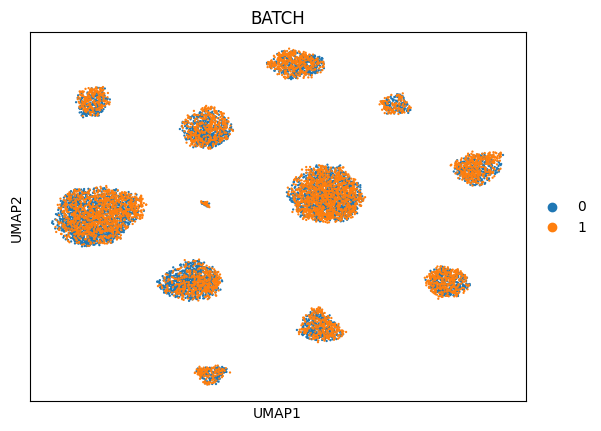

In [ ]:
###########################################
sc.pp.neighbors(adata,random_state=0,use_rep="X_emb")
sc.tl.umap(adata)
###########################################

sc.pl.umap(adata,color=["BATCH"],show=False)
#plt.savefig(save_dir+"scDML_embedding1.png")
# sc.pl.umap(adata,color=["celltype","reassign_cluster"],legend_loc="on data",show=False)
#plt.savefig(save_dir+"scDML_embedding2.png")

# sc.pl.umap(adata,color=["celltype"],groups=["OFFx"],na_in_legend=False)

## evaluation

In [ ]:
# import pandas as pd
# df=pd.crosstab(adata.obs["celltype"],adata.obs["reassign_cluster"])
# col=df.apply('idxmax', axis=1).values
# df=df[col]
# df

In [ ]:
scib.me.ilisi_graph(adata, batch_key="batch", type_="embed", use_rep="X_umap")

Chunk 54 does not have enough neighbors. Skipping...
Chunk 72 does not have enough neighbors. Skipping...
Chunk 502 does not have enough neighbors. Skipping...
Chunk 552 does not have enough neighbors. Skipping...
Chunk 628 does not have enough neighbors. Skipping...
Chunk 768 does not have enough neighbors. Skipping...
Chunk 1287 does not have enough neighbors. Skipping...
Chunk 1658 does not have enough neighbors. Skipping...
Chunk 2185 does not have enough neighbors. Skipping...
Chunk 2467 does not have enough neighbors. Skipping...
Chunk 2710 does not have enough neighbors. Skipping...
Chunk 2935 does not have enough neighbors. Skipping...
Chunk 3407 does not have enough neighbors. Skipping...
Chunk 3480 does not have enough neighbors. Skipping...
Chunk 3488 does not have enough neighbors. Skipping...
Chunk 4378 does not have enough neighbors. Skipping...
Chunk 4524 does not have enough neighbors. Skipping...
Chunk 4577 does not have enough neighbors. Skipping...
Chunk 4626 does no

0.8987666952290709